In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
#printing the first five values from each of training and test dataset

train = pd.read_csv("/Users/abhilashyelahankaramanjaneya/Desktop/Machine_learning_projects/Projects/Datasets/train_tweet.csv")
test = pd.read_csv("/Users/abhilashyelahankaramanjaneya/Desktop/Machine_learning_projects/Projects/Datasets/test_tweet.csv")
print(f" Training tweets are : \n {train.head()} \n ")
print(f" Testing tweets are : \n {test.head()} \n")

train = train[:1000]
test = test[:1000]

 Training tweets are : 
    id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation 
 
 Testing tweets are : 
       id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew... 



In [5]:
#checking if the training and test dataset has any null values 

print(f"Does the train set has any null values ? \n {train.isnull().any()} \n")
print(f"Does the test set has any null values ? \n {test.isnull().any()} \n")

Does the train set has any null values ? 
 id       False
label    False
tweet    False
dtype: bool 

Does the test set has any null values ? 
 id       False
tweet    False
dtype: bool 



In [6]:
#cheching the positive and negetave tweets from the train data set

print(f"The negative tweets from the train dataset are : \n {train[train['label'] == 0].head()} \n")
print(f"The positive tweets from the train dataset are : \n {train[train['label'] == 1].head()} \n")


The negative tweets from the train dataset are : 
    id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation 

The positive tweets from the train dataset are : 
     id  label                                              tweet
13  14      1  @user #cnn calls #michigan middle school 'buil...
14  15      1  no comment!  in #australia   #opkillingbay #se...
17  18      1                             retweet if you agree! 
23  24      1    @user @user lumpy says i am a . prove it lumpy.
34  35      1  it's unbelievable that in the 21st century we'... 



In [7]:
#description based on the positive and negative 
train.groupby("label").describe()

id                                                           
       count        mean         std   min    25%    50%    75%     max
label                                                                  
0      925.0  498.965405  287.898797   1.0  250.0  495.0  744.0  1000.0
1       75.0  519.426667  301.299042  14.0  264.5  551.0  792.5   995.0

<AxesSubplot:>

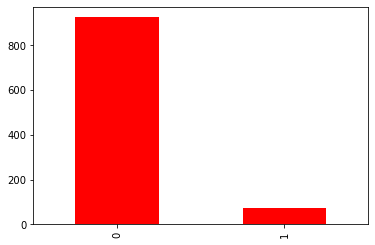

In [8]:
#count based on the positive and negative 
train['label'].value_counts().plot.bar(color = 'red', figsize = (6,4))

In [9]:
#adding the length of each tweet
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

print(train.head(10))

   id  label                                              tweet  len
0   1      0   @user when a father is dysfunctional and is s...  102
1   2      0  @user @user thanks for #lyft credit i can't us...  122
2   3      0                                bihday your majesty   21
3   4      0  #model   i love u take with u all the time in ...   86
4   5      0             factsguide: society now    #motivation   39
5   6      0  [2/2] huge fan fare and big talking before the...  116
6   7      0   @user camping tomorrow @user @user @user @use...   74
7   8      0  the next school year is the year for exams.ð...  143
8   9      0  we won!!! love the land!!! #allin #cavs #champ...   87
9  10      0   @user @user welcome here !  i'm   it's so #gr...   50


Text(0.5, 1.0, 'Top 20 most occuring words')

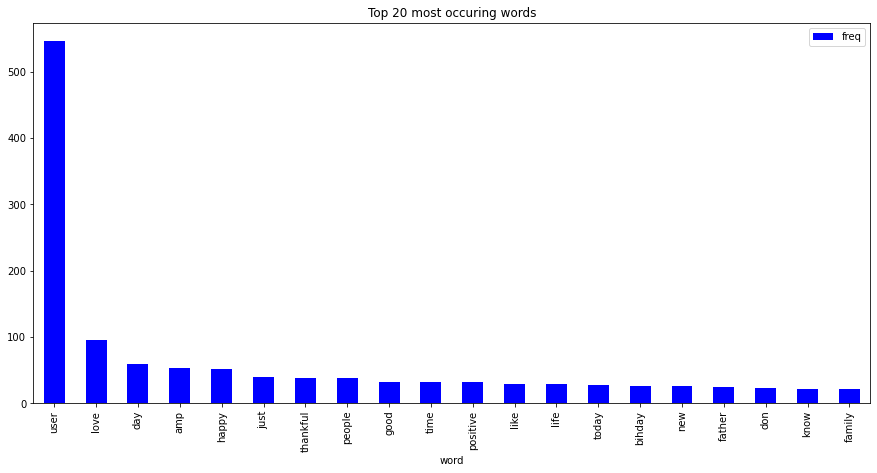

In [10]:
#plotting the top 20 most frequently opccured words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words= 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis = 0)
word_freq = [(word, sum_words[0,i]) for word,i in cv.vocabulary_.items()]
#print(word_freq[:10])
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
#print(word_freq[:10])

freq = pd.DataFrame(word_freq, columns=['word','freq'])

freq.head(20).plot(x = 'word', y = 'freq', kind = 'bar', figsize = (15,7), color = 'blue')
plt.title("Top 20 most occuring words")

Text(0.5, 1.0, 'WordCloud - Vocabulary \n')

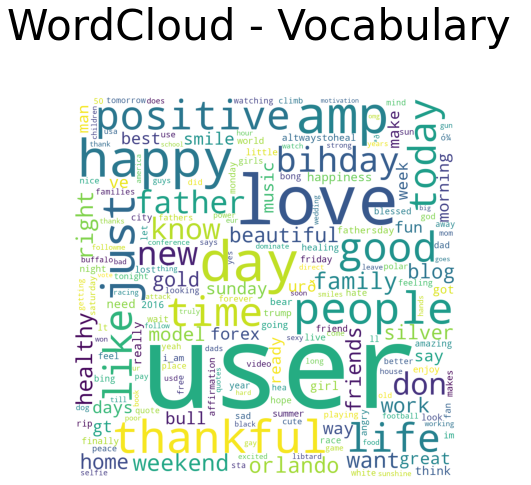

In [56]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud - Vocabulary \n", fontsize = 42)

Text(0.5, 1.0, 'Word Cloud - Neutral words \n')

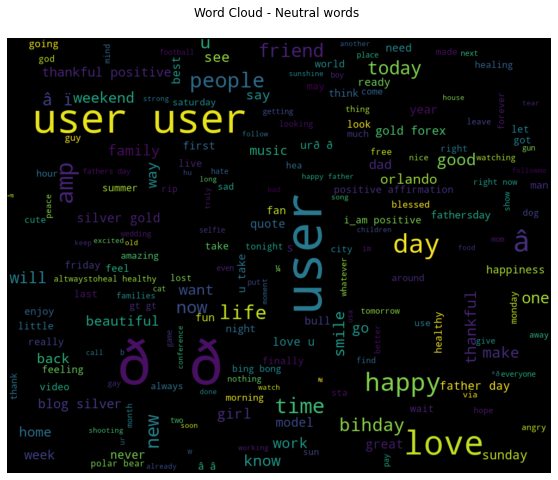

In [13]:
#Creating a word cloud for positive or neutral words

neutral_words = " ".join([text for text in train["tweet"][train["label"] == 0]])

wc = WordCloud(width=1000, height=800, random_state = 0, max_font_size = 110).generate(neutral_words)

plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Neutral words \n")

Text(0.5, 1.0, 'Word Cloud - Negative words \n')

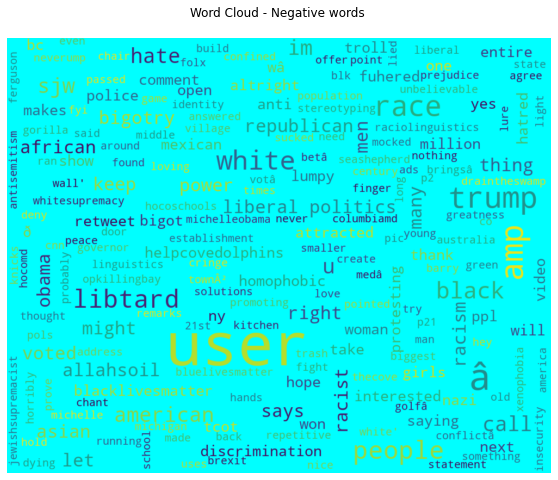

In [14]:
#Creating a word cloud for negative words

negative_words = " ".join([text for text in train['tweet'][train['label'] == 1]])

n_wc = WordCloud(background_color='cyan', width=1000, height=800, random_state=0, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10,8))
plt.imshow(n_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative words \n")

In [ ]:
nw = " ".join(text for text in tweet["train"][tweet["label"] == 1])

wc = WordCloud(background_color="cyan", height=1000, wi)

In [15]:
#collecting the hashtags from positive and negative tweets
import re

def hash_tag(x):
    hashtag = []
    
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtag.append(ht)
    return hashtag

Hash_positive = hash_tag(train['tweet'][train['label'] == 0])
Hash_negative = hash_tag(train['tweet'][train['label'] == 1])

print(f" Sample Hashtags from the positive tweets: \n {Hash_positive[:5]}")
print(f" Sample Hashtags from the negative tweets: \n {Hash_negative[:5]}")

#unnesting of the list

Hash_positive = sum(Hash_positive,[])
Hash_negative = sum(Hash_negative,[])

print("After unnesting \n \n:")
print(f" Sample Hashtags from the positive tweets: \n {Hash_positive[:5]}")
print(f" Sample Hashtags from the negative tweets: \n {Hash_negative[:5]}")

 Sample Hashtags from the positive tweets: 
 [['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]
 Sample Hashtags from the negative tweets: 
 [['cnn', 'michigan', 'tcot'], ['australia', 'opkillingbay', 'seashepherd', 'helpcovedolphins', 'thecove', 'helpcovedolphins'], [], [], ['neverump', 'xenophobia']]
After unnesting 
 
:
 Sample Hashtags from the positive tweets: 
 ['run', 'lyft', 'disapointed', 'getthanked', 'model']
 Sample Hashtags from the negative tweets: 
 ['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']


Hashtag count for the positive tweet 



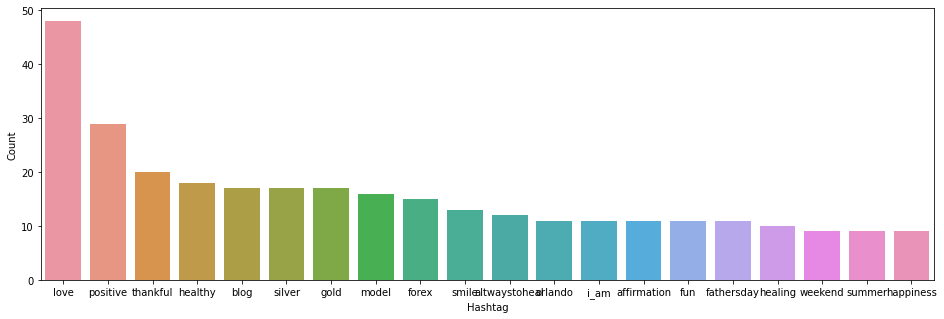



Hashtag count for the negative tweet 



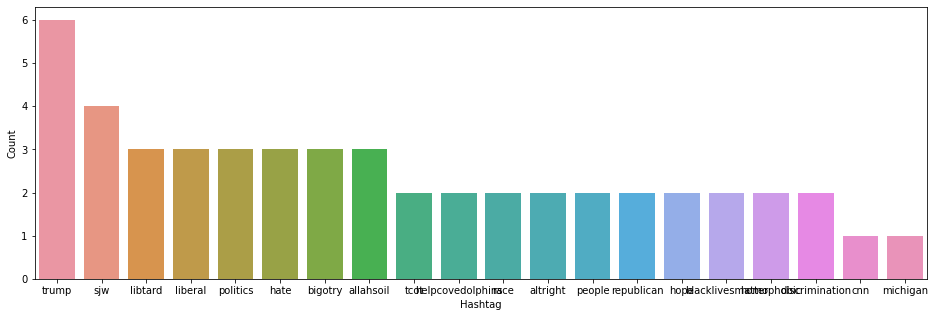

In [16]:
import nltk 

def hash_tag_plot(x):
    
    a = nltk.FreqDist(x)
    
    df = pd.DataFrame({'Hashtag' : list(a.keys()),
                      'Count': list(a.values())})
    
    df = df.nlargest(columns = 'Count', n =20)
    plt.figure(figsize=(16,5))
    ax = sns.barplot(data=df, x = 'Hashtag', y = 'Count')
    ax.set(ylabel = 'Count')
    plt.show()
print('Hashtag count for the positive tweet \n')
x = hash_tag_plot(Hash_positive)
print('\n')
print('Hashtag count for the negative tweet \n')
y = hash_tag_plot(Hash_negative)

In [17]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(131196, 261680)

In [19]:
# model_w2v.wv.most_similar(positive = "dinner")

In [21]:
model_w2v.wv.most_similar(positive = "thankful")

[('#positive', 0.9933021068572998),
 ('friends.', 0.9929429292678833),
 ('am', 0.9922213554382324),
 ('#thankful', 0.9921969771385193),
 ('#affirmation', 0.991246223449707),
 ('#i_am', 0.9907525777816772),
 ('now.', 0.9844667315483093),
 ('weather.', 0.9828812479972839),
 ('having', 0.9770230054855347),
 ('sleep.', 0.9735406637191772)]

In [22]:
model_w2v.wv.most_similar(positive = "apple")

[('#rock', 0.9971327781677246),
 ('wants', 0.997024655342102),
 ('perfect', 0.9962948560714722),
 ('football', 0.9962508678436279),
 ('issue.', 0.996128499507904),
 ('park', 0.9959111213684082),
 ('meeting', 0.9958721995353699),
 ('kids', 0.9957525134086609),
 ('comfo', 0.9956602454185486),
 ('sweet', 0.9956501126289368)]

In [25]:
# model_w2v.wv.most_similar(negative = "trump")

In [26]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]


/Users/abhilashyelahankaramanjaneya/Desktop/Machine_learning_projects/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
<ipython-input-26-c84f5def0bbf>:8: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  output.append(LabeledSentence(s, ["tweet_" + str(i)]))


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [27]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhilashyelahankaramanjaneya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
train_corpus = []

for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [32]:
test_corpus = []

for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [33]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]



print(x.shape)
print(y.shape)

(1000, 2500)
(1000,)


In [34]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)



(1000, 2500)


In [35]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)



(750, 2500)
(250, 2500)
(750,)
(250,)


In [46]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
print("Precision  :", precision_score(y_valid, y_pred))
print("Recall  :", recall_score(y_valid, y_pred))
print("F1 score :", f1_score(y_valid, y_pred))


# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 1.0
Validation Accuracy : 0.928
Precision  : 1.0
Recall  : 0.14285714285714285
F1 score : 0.25
[[229   0]
 [ 18   3]]


In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
print("Precision  :", precision_score(y_valid, y_pred))
print("Recall  :", recall_score(y_valid, y_pred))
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.928
Precision  : 0.6666666666666666
Recall  : 0.2857142857142857
f1 score : 0.4
[[226   3]
 [ 15   6]]


In [54]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
print("Precision  :", precision_score(y_valid, y_pred))
print("Recall  :", recall_score(y_valid, y_pred))
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.928
Precision  : 0.6363636363636364
Recall  : 0.3333333333333333
f1 score : 0.43749999999999994
[[225   4]
 [ 14   7]]


In [55]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
print("Precision  :", precision_score(y_valid, y_pred))
print("Recall  :", recall_score(y_valid, y_pred))
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.972
Validation Accuracy : 0.916
Precision  : 0.0
Recall  : 0.0
f1 score : 0.0
[[229   0]
 [ 21   0]]


/Users/abhilashyelahankaramanjaneya/Desktop/Machine_learning_projects/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# from xgboost import XGBClassifier

# model = XGBClassifier()
# model.fit(x_train, y_train)

# y_pred = model.predict(x_valid)

# print("Training Accuracy :", model.score(x_train, y_train))
# print("Validation Accuracy :", model.score(x_valid, y_valid))

# # calculating the f1 score for the validation set
# print("f1 score :", f1_score(y_valid, y_pred))

# # confusion matrix
# cm = confusion_matrix(y_valid, y_pred)
# print(cm)